### "Human Activity Recognition" 

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

1). 데이터를 가져온다.

데이터의 출처는 [여기](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [82]:
df = pd.read_csv(r'../data/data_human activity recognition.csv', header='infer')

In [83]:
df.shape

(19622, 160)

In [92]:
df.describe()

,Unnamed: 0,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,...,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000
mean,9811.500000,430.640047,64.407197,0.305283,-11.205061,11.312608,-0.005592,0.039588,-0.130538,-5.594690,...,34.715320,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745
std,5664.527827,247.909554,62.750255,22.351242,95.193926,7.742309,0.207329,0.078236,0.241321,29.644785,...,10.055956,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747
min,1.000000,1.000000,-28.900000,-55.800000,-180.000000,0.000000,-1.040000,-0.640000,-1.460000,-120.000000,...,0.000000,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000
25%,4906.250000,222.000000,1.100000,1.760000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,...,29.000000,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000
50%,9811.500000,424.000000,113.000000,5.280000,-13.000000,17.000000,0.030000,0.020000,-0.100000,-15.000000,...,36.000000,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000
75%,14716.750000,644.000000,123.000000,14.900000,12.900000,18.000000,0.110000,0.110000,-0.020000,-5.000000,...,41.000000,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000
max,19622.000000,864.000000,162.000000,60.300000,179.000000,29.000000,2.220000,0.640000,1.620000,85.000000,...,108.000000,3.970000,311.000000,231.000000,477.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


In [93]:
df.head()

,Unnamed: 0,user_name,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,no,11,1.41,8.07,-94.4,3,0.00,0.00,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,no,11,1.41,8.07,-94.4,3,0.02,0.00,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,no,11,1.42,8.07,-94.4,3,0.00,0.00,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,no,12,1.48,8.05,-94.4,3,0.02,0.00,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,no,12,1.48,8.07,-94.4,3,0.02,0.02,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


2). EDA 실시. 결측치를 확인해 본다.

<AxesSubplot:>

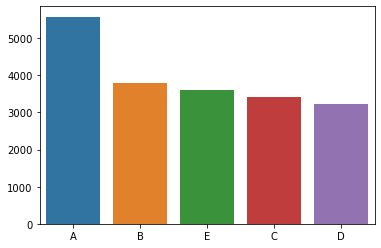

In [99]:
classe = df['classe'].value_counts()
sns.barplot(classe.index, classe.values)

In [85]:
missing = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
missing = missing.rename(columns={0:"count"})
missing.shape

(160, 1)

3). 97% 이상의 값이 결측치인 컬럼은 소거한다.

In [86]:
del_col = missing[missing['count']>df.shape[0]*0.97].index
df = df.drop(columns=del_col, axis=1)
df.shape

(19622, 60)

4). 기타 불필요 컬럼은 소거한다.

In [87]:
keep_columns = []

for c in df.columns:
    if "time" not in c:
        keep_columns.append(c)
    else:
        continue

df = df[keep_columns]
df.shape

(19622, 57)

In [91]:
df.columns

Index(['Unnamed: 0', 'user_name', 'new_window', 'num_window', 'roll_belt',
       'pitch_belt', 'yaw_belt', 'total_accel_belt', 'gyros_belt_x',
       'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x', 'accel_belt_y',
       'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z',
       'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x',
       'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x', 'accel_arm_y',
       'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z',
       'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z'

In [95]:
df = df.drop(['Unnamed: 0', 'user_name', 'new_window'], axis=1)
df.shape

(19622, 54)

5). 반응 변수를 Label Encode 한다.

In [103]:
X = np.array(df.drop(columns="classe"))
Y = np.array(df['classe'])

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(Y)
Y

array([0, 0, 0, ..., 4, 4, 4])

6). 설명 변수들에게 Min-Max Scaling을 적용한다.

In [104]:
MM = preprocessing.MinMaxScaler()
X = MM.fit_transform(X)
X

array([[0.01158749, 0.15877423, 0.5501292 , ..., 0.64702869, 0.6523569 ,
        0.70237518],
       [0.01158749, 0.15877423, 0.5501292 , ..., 0.64651639, 0.65530303,
        0.70092099],
       [0.01158749, 0.15882661, 0.5501292 , ..., 0.64651639, 0.6540404 ,
        0.69898206],
       ...,
       [1.        , 0.91094814, 0.17484927, ..., 0.59631148, 0.10185185,
        0.43771207],
       [1.        , 0.90047145, 0.17140396, ..., 0.62090164, 0.09175084,
        0.4241396 ],
       [1.        , 0.90047145, 0.17054264, ..., 0.625     , 0.08838384,
        0.41832283]])

7). 분류 예측을 실시한다.

- 하이퍼 파라미터 최적화.
- 정확도 계산.
- 90% 이상의 정확도를 목표로 한다.

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [106]:
XGBC = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4, random_state=123)
XGBC.fit(X_train, Y_train)
Y_pred = XGBC.predict(X_test)
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

[14:14:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy : 0.999
